# Lab 11: Interpolation Exercises Part 1

In [1]:
import numpy as np
from scipy.interpolate import CubicSpline, interp1d
import matplotlib.pyplot as plt

### Activity 1: Linear Interpolation

Let's look at an example of linear interpolation similar to what we did in class
Consider the set of x,y data below and find a linear interpolated function to represent the data. 
You will need to complete parts of this code for it work correctly :-)

In [2]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [8, 6, 3, 4, 0, 1, 2, 5, 9, 10, 7]

f = interp1d(x,y)

Find interpolated values for the function at $x$ = 2.5 and $x$ = 7.5. Print the results

In [5]:
print("f(2.5) =",f(2.5))
print("f(7.5) =",f(7.5))

f(2.5) = 3.5
f(7.5) = 7.0


Plot the results to demostrate the above interpolated values at $x=2.5$ and $x = 7.5$ are correct. Add code below to plot these data points as distinct markers as compared to the rest of the data. 

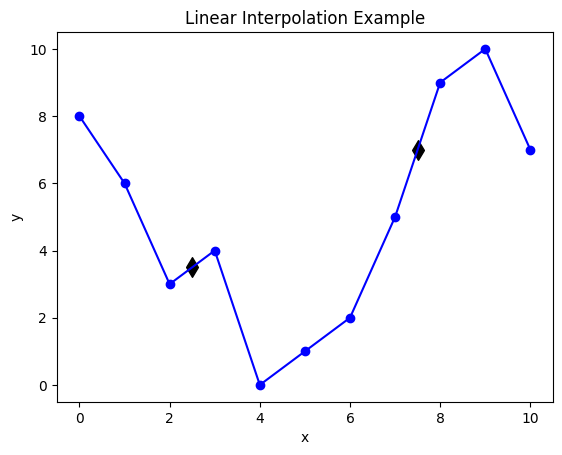

In [12]:
plt.figure()
plt.plot(x, y, '-ob') #note the '-' option for markers will show linear interpolation between the specified data points

### ADD CODE HERE ###
point_size = 100
plt.scatter(2.5, f(2.5), marker='d',color='black', s=point_size)
plt.scatter(7.5, f(7.5), marker='d',color='black', s=point_size)

plt.title('Linear Interpolation Example')

plt.xlabel('x')
plt.ylabel('y')

plt.show()

### Now let's look at another example with on of our favorite functions: $\sin(x)$

Start by creating an array of 10 data points that sample the sine function from [0,9]

In [13]:
x = np.arange(10)
y = np.sin(x)

Plot the linear interpolation and compare with 'true' result

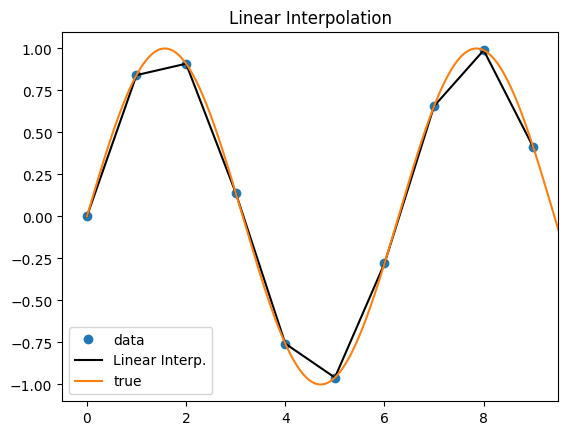

In [14]:
plt.figure()

plt.title('Linear Interpolation')

#plot points to be interpolated
plt.plot(x, y, 'o', label='data')

#show linear interpolation
plt.plot(x, y, '-k',label='Linear Interp.')

#create 'true' sin(x) that is more well sampled for comparison
xs = np.linspace(0, 10, num=1000)
plt.plot(xs, np.sin(xs), label='true')


plt.xlim(-0.5, 9.5)
plt.legend(loc='lower left')
plt.show()

We see that some parts of the linear interpolation match up well with the 'true' function, but other parts have large error. Let's dig into that more. Below, write a bit of code that will calculate the error at the midpoint between each x value in the data set (e.g., x = 0.5, 1.5, 2.5, ... , 8.5). Find the average of the errors and the max error. 

In [28]:
x_mid=np.arange(0.5,9.5)

fsin = interp1d(x, y)
ys_mid = fsin(x_mid)

### ADD CODE ### -  Calculate the % error for each data point. Print the result
true_sin = np.sin(x_mid)
error = (ys_mid - true_sin) / true_sin
error

array([-0.12241744, -0.12241744, -0.12241744, -0.12241744, -0.12241744,
       -0.12241744, -0.12241744, -0.12241744, -0.12241744])

Use the result above to find the average of the error the maximum error. What do you notice about the points where error is largest?

In [30]:
print('Mean error:', np.mean(error))
print('All points have the same error...')

Mean error: -0.12241743810962727
All points have the same error...


### Activity 2: Cubic Spline Interpolation

Let's continue with the previous example of $\sin(x)$, but look at a cubic spline interpolation. Create a cubic spline fit for the data and then evaluate for a new set of $x$ data points between -0.5 and 9.5 in steps of 0.1.

In [31]:
x = np.arange(10)
y = np.sin(x)

cspline = CubicSpline(x, y)
xs = np.arange(-0.5, 9.6, 0.1)

ys = cspline(xs)

Plot the result for comparison

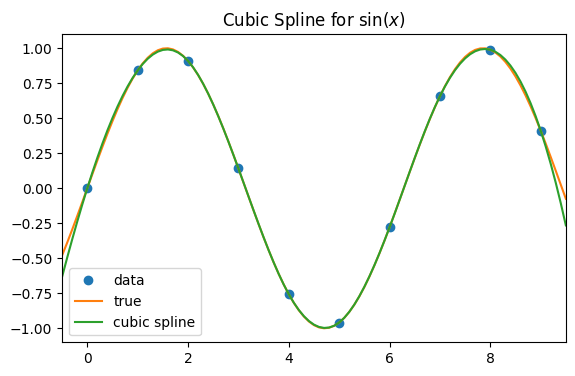

In [34]:
fig, ax = plt.subplots(figsize=(6.5, 4))
plt.title(r'Cubic Spline for $\sin(x)$')
plt.plot(x, y, 'o', label='data')
plt.plot(xs, np.sin(xs), label='true')
plt.plot(xs, ys, label="cubic spline")
plt.xlim(-0.5, 9.5)
plt.legend()
plt.show()

Cubic splines can also be used to construct derivative quantities. Let's take a look at S'(x) an compare with the known analytic derivative of our function. 

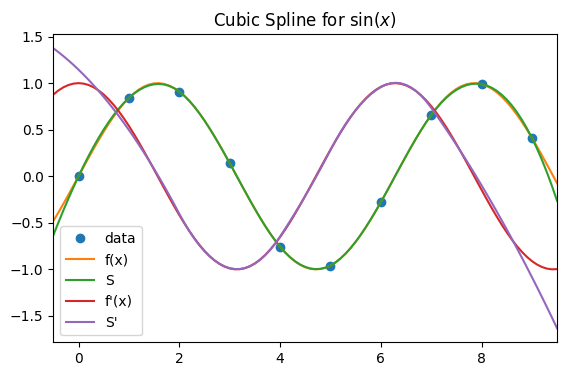

In [35]:
fig, ax = plt.subplots(figsize=(6.5, 4))
plt.title(r'Cubic Spline for $\sin(x)$')

#add data markers
plt.plot(x, y, 'o', label='data')

#add f(x) and s(x) to plot
plt.plot(xs, np.sin(xs), label='f(x)')
plt.plot(xs, ys, label="S")

#add f'(x) and s'(x) to plot
plt.plot(xs,np.cos(xs),label='f\'(x)')
plt.plot(xs, cspline(xs, nu=1), label="S'")

plt.xlim(-0.5, 9.5)
plt.legend(loc='lower left')
plt.show()

Note the spline curves $S(x)$ and $S'(x)$  do a respectable job following the data in regions of interpolation. However, outside of the data range, the results are extrapolation which starts to diverge from the true values rather quickly. This is not unexpected because extrapolation is hard... However, we might do better with a different set of boundary condidtions as shown below: 

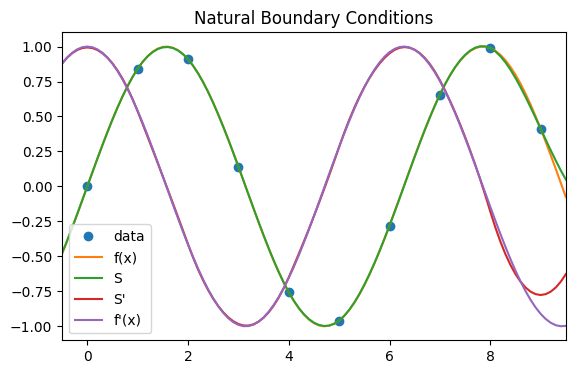

In [36]:
#specify BCs on cubic spline
csn = CubicSpline(x, y,bc_type='natural')
xs = np.arange(-0.5, 9.6, 0.1)

fig, ax = plt.subplots(figsize=(6.5, 4))
plt.title('Natural Boundary Conditions')

plt.plot(x, y, 'o', label='data')

plt.plot(xs, np.sin(xs), label='f(x)')
plt.plot(xs, csn(xs), label="S")

plt.plot(xs, csn(xs, 1), label="S'")
plt.plot(xs,np.cos(xs),label='f\'(x)')

plt.xlim(-0.5, 9.5)
plt.legend()
plt.show()

Take a moment to compare differences between this plot and the last plot, and consider why the 'natural' boundary conditions improve the extrapolation less than zero, but don't improve the extrapolation beyond 9. 

## Activity 3: Cubic Spline as a Linear Algebra problem


Consider the data below and the matricies representing the equations of constraint for the cubic spline process. 

In [54]:
# Input Data
x = np.array([2,3,4])
y = np.array([3,2,4])

A = np.array([[8,4,2,1,0,0,0,0],
              [27,9,3,1,0,0,0,0], 
              [0,0,0,0,27,9,3,1],
              [0,0,0,0,64,16,4,1],
              [27,6,1,0,-27,-6,-1,0],
              [18,2,0,0,-18,-2,0,0],
              [12,2,0,0,0,0,0,0],
              [0,0,0,0,24,2,0,0]])

b = np.array([3,2,2,4,0,0,0,0])

Find the $x$ vector representing the solution of the system of equations (It may help to think back to our linear algebra exercises 🙂 )

In [94]:
### ADD CODE BELOW
sol = np.linalg.solve(A,b)
sol

array([  0.75,  -4.5 ,   7.25,   0.5 ,  -0.75,   9.  , -33.25,  41.  ])

Take the elements of $x$ and construct the appropriate polynomial equations for the piecewise functions. Plot them along with the original data. 

The results 'sol' give the 4 coefficents for each of the two cubic splines, in reverse order. That is, the 0 index element goes with the cube term, then the next goes with the square term, etc etc. So we'll split the two splines apart, and then flip the array so the coefficients increase in order; that'll make the spline function easier.

In [101]:
### coefficients for first spline
coeffs1 = np.flip(sol[0:4])

### coefficients for second spline
coeffs2 = np.flip(sol[4:])

In [102]:
### ADD CODE BELOW
def cubic_spline_manual(x, coeffs):
    g = 0
    for i in range(len(coeffs)):
        g += coeffs[i] * x**i
    return g

In [104]:
x_region1 = np.linspace(2,3,100)
x_region2 = np.linspace(3,4,100)

spline1 = np.array([])
for i in range(len(x_region1)):
    spline1 = np.append(spline1, cubic_spline_manual(x_region1[i], coeffs1))

spline2 = np.array([])
for i in range(len(x_region2)):
    spline2 = np.append(spline2, cubic_spline_manual(x_region2[i], coeff2))

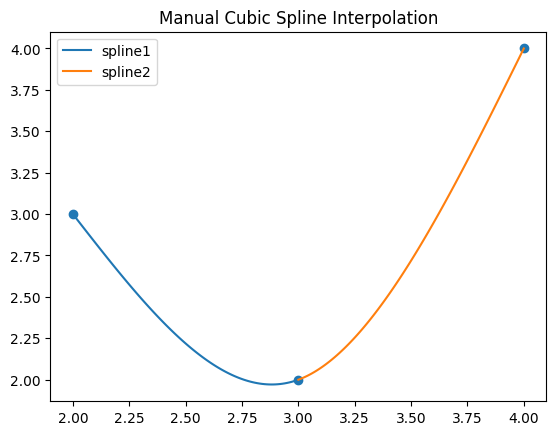

In [106]:
plt.scatter(x, y)
plt.title('Manual Cubic Spline Interpolation')
plt.plot(x_region1, spline1, label='spline1')
plt.plot(x_region2, spline2, label='spline2')
plt.legend()
plt.show()